In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cm as cm



**NOTE** The user can titratate the following conditions to build homotypic phase diagrams:

- epsilon_to_FHtheory.build_SALT_dependent_phase_diagrams
- epsilon_to_FHtheory.build_PH_dependent_phase_diagrams
- epsilon_to_FHtheorybuild_DIELECTRIC_dependent_phase_diagrams

In [9]:
def sample_colormap(n_colors, cmap_name='viridis'):
    """ Sample 'n_colors' uniformly from the colormap named 'cmap_name'. """
    cmap = cm.get_cmap(cmap_name)  # Get the colormap
    colors = cmap(np.linspace(0, 1, n_colors))  # Generate evenly spaced numbers and apply colormap
    return colors

# Build salt-dependent phase diagram

In [4]:
from finches import Mpipi_frontend
from finches import CALVADOS_frontend

mf = Mpipi_frontend()
cf = CALVADOS_frontend()

/Users/alex/Dropbox/WASHU/Holehouse/tools/finches/finches/finches/forcefields/calvados.py:235: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.038286503882254706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  r.loc['H','q'] = 1. / ( 1 + 10**(self.pH-6) )


/var/folders/2n/xtzsyspd32v6vglg_pd5gmw80000gn/T/ipykernel_53922/517132981.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name)  # Get the colormap


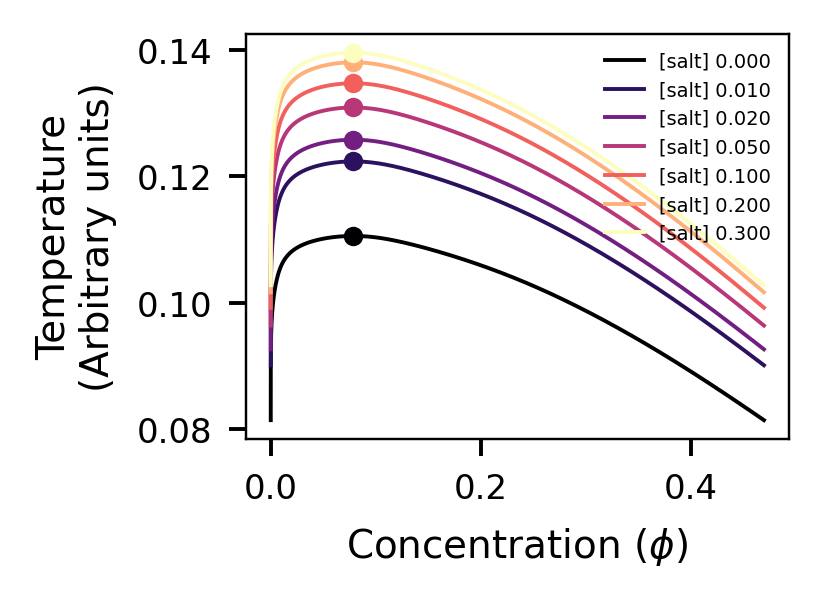

In [31]:
test_IDR = 'GSMASASSSQRGRSGSGNFGGGRGGGFGGNDNFGRGGNFSGRGGFGGSRGGGGYGGSGDGYNGFGNDGSNFGGGGSYNDFGNYNNQSSNFGPMKGGNFGGRSSGGSGGGGQYFAKPRNQGGYGGSSSSSSYGSGRRF'


# initialize the figure
f, ax = plt.subplots(1,1 ,figsize=(2, 1.5), dpi=350, facecolor='w', edgecolor='k')

salts = [0, 0.01, 0.02, 0.05,0.1,0.2,0.3]
colors = sample_colormap(len(salts), 'magma')

for idx, salt in enumerate(salts):

    # initialize an Mpipi frontend object at the specified salt
    mf = Mpipi_frontend(salt=salt)

    phase_diagram_out = mf.build_phase_diagram(test_IDR)


    ax.plot(phase_diagram_out[0], phase_diagram_out[3],'-', color=colors[idx],linewidth=0.8)
    ax.plot(phase_diagram_out[1], phase_diagram_out[3],'-', color=colors[idx],linewidth=0.8, label='[salt] %.3f' % (salt))   
    ax.plot(phase_diagram_out[2][0], phase_diagram_out[2][1],'.', color=colors[idx],linewidth=0.5, ms=8,  mew=0)
    

ax.set_xlabel(r'Concentration ($\phi$)', fontsize=8)
ax.set_ylabel('Temperature\n(Arbitrary units)', fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
ax.legend(loc='upper right', fancybox=True, fontsize=4,edgecolor=None, framealpha=0)
    
    

    




In [8]:
from finches import Mpipi_frontend
from finches import CALVADOS_frontend

cf0 = CALVADOS_frontend(salt=0)
cf3 = CALVADOS_frontend(salt=0.15)

mf0 = Mpipi_frontend(salt=0)
mf3 = Mpipi_frontend(salt=0.15)



/Users/alex/Dropbox/WASHU/Holehouse/tools/finches/finches/finches/forcefields/calvados.py:235: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.038286503882254706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  r.loc['H','q'] = 1. / ( 1 + 10**(self.pH-6) )
/Users/alex/Dropbox/WASHU/Holehouse/tools/finches/finches/finches/forcefields/calvados.py:235: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.038286503882254706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  r.loc['H','q'] = 1. / ( 1 + 10**(self.pH-6) )


In [22]:
test_IDR2 = 'RGSGSR'
test_IDR2 = 'GGGYGGDGRRGGGY'*10
test_IDR2

'GGGYGGDGRRGGGYGGGYGGDGRRGGGYGGGYGGDGRRGGGYGGGYGGDGRRGGGYGGGYGGDGRRGGGYGGGYGGDGRRGGGYGGGYGGDGRRGGGYGGGYGGDGRRGGGYGGGYGGDGRRGGGYGGGYGGDGRRGGGY'

In [20]:
cf0_v = cf0.epsilon(test_IDR2,test_IDR2, use_charge_weighting=True)
cf3_v = cf3.epsilon(test_IDR2,test_IDR2, use_charge_weighting=True)
mf0_v = mf0.epsilon(test_IDR2,test_IDR2, use_charge_weighting=True)
mf3_v = mf3.epsilon(test_IDR2,test_IDR2, use_charge_weighting=True)

In [21]:
if cf0_v < cf3_v and mf0_v >mf3_v:
    print('YES')

print(cf0_v)
print(cf3_v)
print(mf0_v)
print(mf3_v)

YES
-62.26905521008695
-52.83877899027087
-13.09034267055543
-15.052502442764421


/var/folders/2n/xtzsyspd32v6vglg_pd5gmw80000gn/T/ipykernel_53922/517132981.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name)  # Get the colormap
/Users/alex/Dropbox/WASHU/Holehouse/tools/finches/finches/finches/forcefields/calvados.py:235: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.038286503882254706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  r.loc['H','q'] = 1. / ( 1 + 10**(self.pH-6) )
/Users/alex/Dropbox/WASHU/Holehouse/tools/finches/finches/finches/forcefields/calvados.py:235: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.038286503882254706' has dtype incompatible 

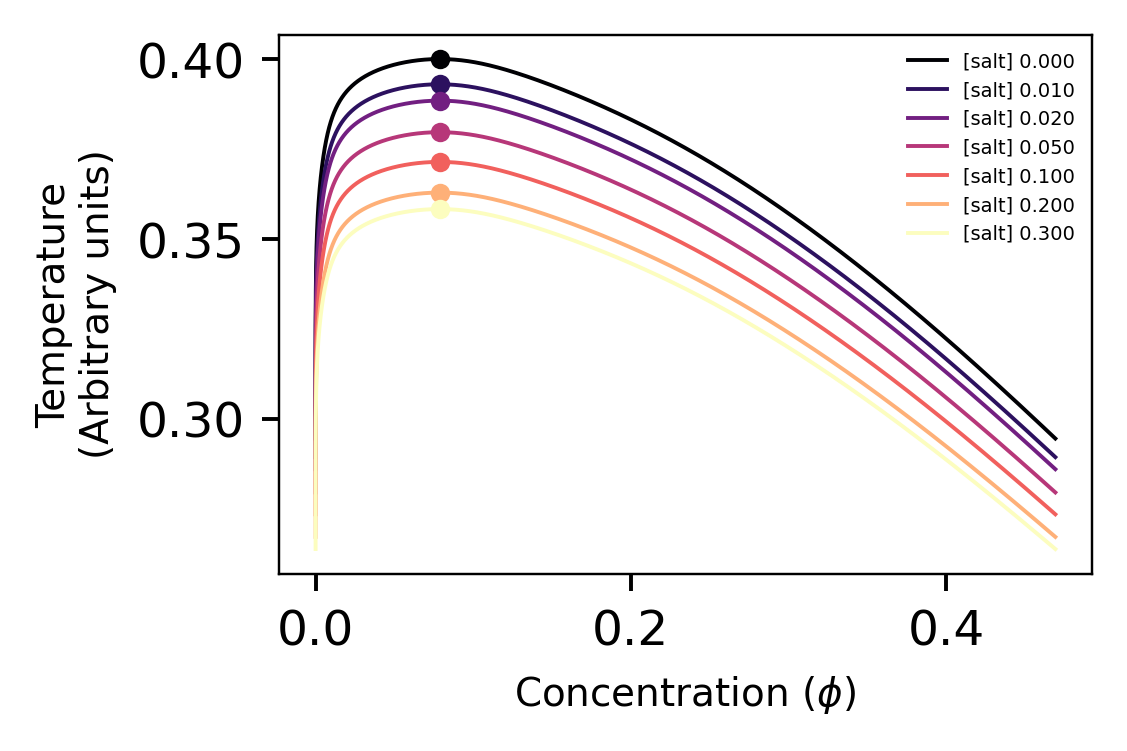

In [37]:
test_IDR =  'GSMASASSSQRGRSGSGNFGGGRGGGFGGNDNFGRGGNFSGRGGFGGSRGGGGYGGSGDGYNGFGNDGSNFGGGGSYNDFGNYNNQSSNFGPMKGGNFGGRSSGGSGGGGQYFAKPRNQGGYGGSSSSSSYGSGRRF'
test_IDR2 = 'GSMASASSSQRGSGSRGNFGGGRGGGFGGNDNFGRGGNFSGRGGFGGSRGGGGYGGSGDGYNGFGNDGSNFGGGGSYNDFGNYNNQSSNFGPMKGGNFGGRSSGGSGGGGQYFAKPNQGRGYGGSRSSSSSYGSGRF'


# initialize the figure
f, ax = plt.subplots(1,1 ,figsize=(3, 2), dpi=350, facecolor='w', edgecolor='k')

salts = [0, 0.01, 0.02, 0.05,0.1,0.2,0.3]
colors = sample_colormap(len(salts), 'magma')

for idx, salt in enumerate(salts):

    # initialize an Mpipi frontend object at the specified salt
    mf = CALVADOS_frontend(salt=salt)

    phase_diagram_out = mf.build_phase_diagram(test_IDR)


    ax.plot(phase_diagram_out[0], phase_diagram_out[3],'-', color=colors[idx],linewidth=0.8)
    ax.plot(phase_diagram_out[1], phase_diagram_out[3],'-', color=colors[idx],linewidth=0.8, label='[salt] %.3f' % (salt))   
    ax.plot(phase_diagram_out[2][0], phase_diagram_out[2][1],'.', color=colors[idx],linewidth=0.5, ms=8,  mew=0)
    

ax.set_xlabel(r'Concentration ($\phi$)', fontsize=8)
ax.set_ylabel('Temperature\n(Arbitrary units)', fontsize=8)
ax.legend(loc='upper right', fancybox=True, fontsize=4,edgecolor=None, framealpha=0)
    
    

    


